# Student Details

- **Name**: Pranav Arora
- **Student #**: 202286040
- **Course**: COMP6934 Data Visualization
- **Assignment #**: 7

### Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import geopandas
import folium

In [2]:
cdf = geopandas.read_file('canada.shp')
udf = geopandas.read_file('umbra_lo.shp')

### Getting Umbra CRS

In [3]:
udf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Changing cdf to EPSG:4326

In [4]:
cdf = cdf.to_crs("EPSG:4326")

In [5]:
cdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
cdf.head()

,GEO,Population,geometry
0,Newfoundland and Labrador,520553,"MULTIPOLYGON (((-57.40258 54.14964, -57.38431 ..."
1,Prince Edward Island,164318,"MULTIPOLYGON (((-61.98301 46.45775, -61.98137 ..."
2,Nova Scotia,992055,"MULTIPOLYGON (((-61.90234 45.87878, -61.90057 ..."
3,New Brunswick,789225,"MULTIPOLYGON (((-64.80155 47.80365, -64.80155 ..."
4,Quebec,8604495,"MULTIPOLYGON (((-58.64702 51.20815, -58.63989 ..."


In [7]:
udf

,UTCTime,UTCSec,CenterLon,CenterLat,CenterAlt,Duration,SunAlt,SunAz,MoonL,MoonB,MoonC,MoonDist,geometry
0,16:38:50,59930,-24.09575,48.14893,0,131.05,3.0,278.1,1.187,-0.115,339.25,359552.0,"POLYGON ((-157.78564 -7.92730, -157.74170 -7.9..."
1,16:39:00,59940,-24.09575,48.14893,0,131.05,3.0,278.1,1.187,-0.115,339.25,359552.0,"POLYGON ((-156.02783 -7.44357, -155.98389 -7.4..."
2,16:39:10,59950,-24.09575,48.14893,0,131.05,3.0,278.1,1.187,-0.115,339.25,359552.0,"POLYGON ((-154.88525 -7.18078, -154.84131 -7.1..."
3,16:39:20,59960,-24.09575,48.14893,0,131.05,3.0,278.1,1.187,-0.115,339.25,359552.0,"POLYGON ((-153.65479 -6.96413, -153.61084 -6.9..."
4,16:39:30,59970,-24.09575,48.14893,0,131.05,3.0,278.1,1.187,-0.115,339.25,359552.0,"POLYGON ((-152.99561 -6.78739, -152.95166 -6.7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,19:54:50,71690,-24.09575,48.14893,0,131.05,3.0,278.1,1.187,-0.115,339.25,359552.0,"POLYGON ((-29.15771 48.76326, -29.11377 48.766..."
1177,19:55:00,71700,-24.09575,48.14893,0,131.05,3.0,278.1,1.187,-0.115,339.25,359552.0,"POLYGON ((-28.41064 48.62970, -28.36670 48.632..."
1178,19:55:10,71710,-24.09575,48.14893,0,131.05,3.0,278.1,1.187,-0.115,339.25,359552.0,"POLYGON ((-27.09229 48.49582, -27.04834 48.497..."
1179,19:55:20,71720,-24.09575,48.14893,0,131.05,3.0,278.1,1.187,-0.115,339.25,359552.0,"POLYGON ((-26.30127 48.28150, -26.25732 48.285..."


### Constructing a Dataframe having regions with 3 minutes(60 secs intervals)

In [8]:
udf['NLTSecs'] = udf['UTCSec'] - 9000

In [9]:
interval_udf = pd.DataFrame()
init_sec = 50930

while init_sec <= 62630:
    interval_udf = pd.concat([interval_udf, udf[udf['NLTSecs'] == init_sec]])
    init_sec += 180

interval_udf


,UTCTime,UTCSec,CenterLon,CenterLat,CenterAlt,Duration,SunAlt,SunAz,MoonL,MoonB,MoonC,MoonDist,geometry,NLTSecs
0,16:38:50,59930,-24.09575,48.14893,0,131.05,3.0,278.1,1.187,-0.115,339.25,359552.0,"POLYGON ((-157.78564 -7.92730, -157.74170 -7.9...",50930
18,16:41:50,60110,-148.64004,-5.95854,0,147.81,10.4,81.1,2.821,-0.111,339.23,358471.2,"POLYGON ((-146.97510 -5.11303, -146.93115 -5.1...",51110
36,16:44:50,60290,-142.99282,-4.33414,0,161.46,17.0,80.7,2.796,-0.111,339.23,357770.3,"POLYGON ((-142.53662 -3.56991, -142.49268 -3.5...",51290
54,16:47:50,60470,-139.22386,-2.97202,0,171.57,21.7,80.6,2.770,-0.112,339.23,357286.4,"POLYGON ((-138.88916 -2.20520, -138.84521 -2.2...",51470
72,16:50:50,60650,-136.27758,-1.72855,0,180.07,25.5,80.8,2.745,-0.112,339.23,356900.8,"POLYGON ((-136.20850 -0.97486, -136.16455 -0.9...",51650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,19:41:50,70910,-58.33661,48.02822,0,184.82,27.5,249.1,1.293,-0.115,339.25,356922.6,"POLYGON ((-57.54639 48.89970, -57.50244 48.904...",61910
1116,19:44:50,71090,-53.77574,48.55355,0,176.53,24.0,253.4,1.268,-0.115,339.25,357276.9,"POLYGON ((-53.02002 49.38012, -52.97607 49.385...",62090
1134,19:47:50,71270,-48.25574,48.95399,0,167.03,19.9,258.4,1.242,-0.115,339.25,357702.7,"POLYGON ((-47.43896 49.73044, -47.39502 49.734...",62270
1152,19:50:50,71450,-41.04952,49.12585,0,155.41,14.7,264.6,1.217,-0.115,339.25,358255.4,"POLYGON ((-40.71533 49.81733, -40.67139 49.821...",62450


In [10]:
utc_time = interval_udf['UTCTime']
utc_time = pd.to_datetime(utc_time, format='%H:%M:%S')
interval_udf['NLTime'] = (utc_time - pd.Timedelta(hours=2, minutes=30)).dt.strftime('%H:%M:%S')
interval_udf

,UTCTime,UTCSec,CenterLon,CenterLat,CenterAlt,Duration,SunAlt,SunAz,MoonL,MoonB,MoonC,MoonDist,geometry,NLTSecs,NLTime
0,16:38:50,59930,-24.09575,48.14893,0,131.05,3.0,278.1,1.187,-0.115,339.25,359552.0,"POLYGON ((-157.78564 -7.92730, -157.74170 -7.9...",50930,14:08:50
18,16:41:50,60110,-148.64004,-5.95854,0,147.81,10.4,81.1,2.821,-0.111,339.23,358471.2,"POLYGON ((-146.97510 -5.11303, -146.93115 -5.1...",51110,14:11:50
36,16:44:50,60290,-142.99282,-4.33414,0,161.46,17.0,80.7,2.796,-0.111,339.23,357770.3,"POLYGON ((-142.53662 -3.56991, -142.49268 -3.5...",51290,14:14:50
54,16:47:50,60470,-139.22386,-2.97202,0,171.57,21.7,80.6,2.770,-0.112,339.23,357286.4,"POLYGON ((-138.88916 -2.20520, -138.84521 -2.2...",51470,14:17:50
72,16:50:50,60650,-136.27758,-1.72855,0,180.07,25.5,80.8,2.745,-0.112,339.23,356900.8,"POLYGON ((-136.20850 -0.97486, -136.16455 -0.9...",51650,14:20:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,19:41:50,70910,-58.33661,48.02822,0,184.82,27.5,249.1,1.293,-0.115,339.25,356922.6,"POLYGON ((-57.54639 48.89970, -57.50244 48.904...",61910,17:11:50
1116,19:44:50,71090,-53.77574,48.55355,0,176.53,24.0,253.4,1.268,-0.115,339.25,357276.9,"POLYGON ((-53.02002 49.38012, -52.97607 49.385...",62090,17:14:50
1134,19:47:50,71270,-48.25574,48.95399,0,167.03,19.9,258.4,1.242,-0.115,339.25,357702.7,"POLYGON ((-47.43896 49.73044, -47.39502 49.734...",62270,17:17:50
1152,19:50:50,71450,-41.04952,49.12585,0,155.41,14.7,264.6,1.217,-0.115,339.25,358255.4,"POLYGON ((-40.71533 49.81733, -40.67139 49.821...",62450,17:20:50


### Converting the `interval_udf` to GeoJSON format

In [11]:
interval_udf.to_file('interval_udf.geojson', driver='GeoJSON')

In [12]:
geo_udf = geopandas.read_file('interval_udf.geojson')
geo_udf

,UTCTime,UTCSec,CenterLon,CenterLat,CenterAlt,Duration,SunAlt,SunAz,MoonL,MoonB,MoonC,MoonDist,NLTSecs,NLTime,geometry
0,16:38:50,59930,-24.09575,48.14893,0,131.05,3.0,278.1,1.187,-0.115,339.25,359552.0,50930,14:08:50,"POLYGON ((-157.78564 -7.92730, -157.74170 -7.9..."
1,16:41:50,60110,-148.64004,-5.95854,0,147.81,10.4,81.1,2.821,-0.111,339.23,358471.2,51110,14:11:50,"POLYGON ((-146.97510 -5.11303, -146.93115 -5.1..."
2,16:44:50,60290,-142.99282,-4.33414,0,161.46,17.0,80.7,2.796,-0.111,339.23,357770.3,51290,14:14:50,"POLYGON ((-142.53662 -3.56991, -142.49268 -3.5..."
3,16:47:50,60470,-139.22386,-2.97202,0,171.57,21.7,80.6,2.770,-0.112,339.23,357286.4,51470,14:17:50,"POLYGON ((-138.88916 -2.20520, -138.84521 -2.2..."
4,16:50:50,60650,-136.27758,-1.72855,0,180.07,25.5,80.8,2.745,-0.112,339.23,356900.8,51650,14:20:50,"POLYGON ((-136.20850 -0.97486, -136.16455 -0.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,19:41:50,70910,-58.33661,48.02822,0,184.82,27.5,249.1,1.293,-0.115,339.25,356922.6,61910,17:11:50,"POLYGON ((-57.54639 48.89970, -57.50244 48.904..."
62,19:44:50,71090,-53.77574,48.55355,0,176.53,24.0,253.4,1.268,-0.115,339.25,357276.9,62090,17:14:50,"POLYGON ((-53.02002 49.38012, -52.97607 49.385..."
63,19:47:50,71270,-48.25574,48.95399,0,167.03,19.9,258.4,1.242,-0.115,339.25,357702.7,62270,17:17:50,"POLYGON ((-47.43896 49.73044, -47.39502 49.734..."
64,19:50:50,71450,-41.04952,49.12585,0,155.41,14.7,264.6,1.217,-0.115,339.25,358255.4,62450,17:20:50,"POLYGON ((-40.71533 49.81733, -40.67139 49.821..."


## Answer 1

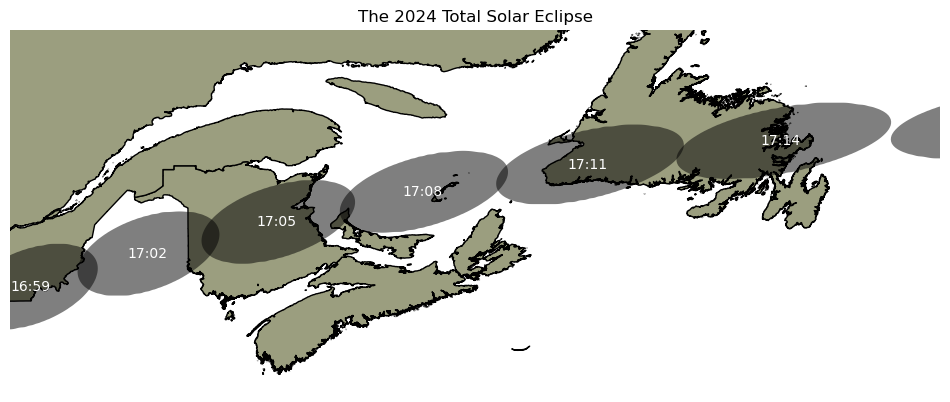

In [13]:
fig, ax = plt.subplots(figsize=(12,8))

ax = cdf.head().plot(ax=ax, color='#9b9e7f', ec='k')
ax = geo_udf.plot(ax=ax, color='k', alpha=0.5)

ax.set_title('The 2024 Total Solar Eclipse')

for index, row in geo_udf.iterrows():
    center_lon = row['CenterLon']
    center_lat = row['CenterLat']
    if -72.0 < center_lon < -50.0:
        label_text = str(row['NLTime'])[:-3]
        ax.text(center_lon, center_lat, label_text, fontsize=10, ha='center', va='center', color='w')

ax.set_xlim((-72, -50))
ax.set_ylim((43, 51))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)


## Answer 2

In [14]:
fmap = folium.Map(location=[47.6, -57.7], tiles="ESRI WorldTopoMap", zoom_start=6)

folium.GeoJson(
    geo_udf,
    name="The 2024 Total Solar Eclipse",
    color='gray',
    weight=1,
).add_to(fmap)

fmap

## Attributions

1. Professor's Lecture 26
2. GeoPandas - https://geopandas.org/en/stable/index.html
3. GeoDataFrame - https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html
4. Pandas TimeDelta - https://pandas.pydata.org/docs/reference/api/pandas.Timedelta.html
5. Folium - https://pypi.org/project/folium/
6. GeoJSON - https://python-visualization.github.io/folium/latest/user_guide/geojson/geojson.html